#  프로젝트: 고양이 수염 스티커 만들기    



In [7]:
# 필요한 패키지 import 하기
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import matplotlib.image as img
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리 

print(cv2.__version__)
print(dlib.__version__)

4.5.3
19.22.1


## Step 1. 스티커 구하기 or 만들기
스티커를 만들거나 구해야합니다. PPT, 포토샵 등을 이용해서 직접 만드셔도 좋습니다. 보다 간단한 방법은 픽토그램 아이콘을 이용하면 쉽게 만들 수 있습니다.

고양이는 사랑스럽기 때문에 고양이 수염 스티커를 붙여보겠습니다.

In [8]:
dir_path = os.getenv('HOME')+'/aiffel/camera_sticker/pictures'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['cat-whiskers1.png', 'cat-whiskers2.png', 'moustache.png', '한소희.png', '한소희_옆.png', 'rabbit.png', 'hero.png', '한소희_어둡.png', 'cat-face.png', '한소희_먼.png', 'king.png', '한소희_기움.png']


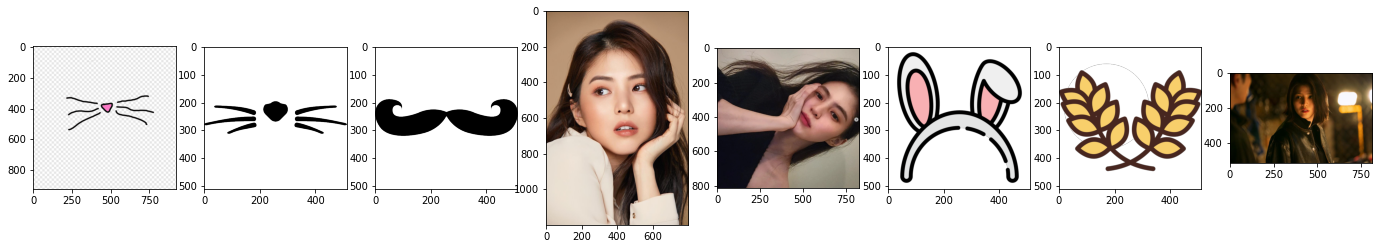

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=8, figsize=(24,10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
  image = img.imread(dir_path+'/'+file_list[i])
  ax.imshow(image)
plt.show()

fig.tight_layout()

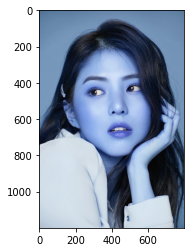

In [10]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/pictures/한소희.png' # 사진 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(my_image_path, cv2.IMREAD_UNCHANGED)    # OpenCV로 이미지를 불러옵니다

img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr)  

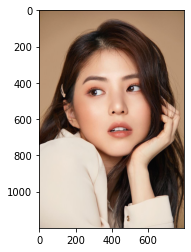

In [11]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)    
plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show() # 이미지 실제 출력

error: OpenCV(4.5.3) /tmp/pip-req-build-agffqapq/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor' 에러가 나왔다.    
지영, 소명님 도움으로 경로에 'os.getenv('HOME')+'를 추가했더니 해결되었다. 

Ref.   
https://damio.tistory.com/57 경로 설정이나 오타로인한 오류 

In [12]:
img_rgb.shape

(1200, 800, 3)

## Step 2. 얼굴 검출 & 랜드마크 검출 하기
오늘 배운 dlib을 이용해서 얼굴의 bounding box 위치와 landmark의 위치를 찾아주세요.   

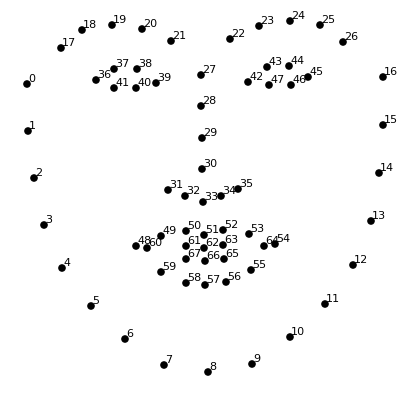

In [13]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환
print("\n   🌞   \n  \n  \n 🌵 🐪 🌴")


   🌞   
  
  
 🌵 🐪 🌴


In [14]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("\n   🌞   \n  \n  \n 🌵 🐪 🌴")


   🌞   
  
  
 🌵 🐪 🌴


In [15]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽 x좌표
    t = dlib_rect.top() # 위쪽 y좌표
    r = dlib_rect.right() # 오른쪽 x좌표 
    b = dlib_rect.bottom() # 아래쪽 y좌표

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,20))
plt.imshow(img_show_rgb)
plt.show()

# 직사각형은 left-top, right-bottom 좌표만으로 충분 

rectangles[[(194, 297) (656, 759)]]


## Step 3. 스티커 적용 위치 확인하기
고양이 수염이 적용 될 위치를 landmark를 사용해서 계산해 주세요.

In [16]:
# !wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2

In [17]:
# !mv shape_predictor_68_face_landmarks.dat.bz2 ~/aiffel/camera_sticker/models

In [18]:
# !cd ~/aiffel/camera_sticker && bzip2 -d ./models/shape_predictor_68_face_landmarks.dat.bz2

In [19]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
    # 저장한 landmark 모델의 주소를 model_path 변수에 저장
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄
print("\n   🌞   \n  \n  \n 🌵 🐪 🌴")


   🌞   
  
  
 🌵 🐪 🌴


In [20]:
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성    

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts())) # 각각의 좌표를 parts() 메서드로 리스트화하는 것 
        # (points.parts().x, points.parts().y)
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list 
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


In [21]:
list_landmarks

[[(181, 492),
  (193, 549),
  (210, 606),
  (233, 660),
  (263, 707),
  (305, 745),
  (349, 779),
  (398, 806),
  (449, 808),
  (498, 793),
  (539, 757),
  (577, 719),
  (605, 676),
  (621, 626),
  (629, 572),
  (630, 517),
  (625, 462),
  (232, 411),
  (259, 380),
  (303, 367),
  (346, 369),
  (389, 384),
  (450, 377),
  (484, 360),
  (522, 354),
  (561, 359),
  (590, 380),
  (426, 436),
  (430, 468),
  (434, 501),
  (438, 534),
  (402, 575),
  (421, 577),
  (440, 579),
  (457, 574),
  (473, 570),
  (278, 462),
  (299, 440),
  (330, 439),
  (360, 459),
  (331, 467),
  (301, 470),
  (483, 449),
  (501, 423),
  (531, 421),
  (558, 437),
  (537, 448),
  (508, 451),
  (378, 673),
  (397, 636),
  (425, 617),
  (444, 621),
  (462, 616),
  (491, 630),
  (513, 662),
  (496, 692),
  (471, 705),
  (451, 708),
  (430, 707),
  (402, 698),
  (393, 669),
  (427, 645),
  (446, 643),
  (464, 643),
  (498, 662),
  (466, 671),
  (448, 674),
  (428, 675)]]

In [22]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.figure(figsize=(10,20))
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

## Step 4. 스티커 적용하기
(1) 오늘 배운 np.where 를 사용해서 스티커를 적용해 주세요.

(2) 스티커를 조금 더 자연스럽게 보이게 하려면 어떻게 해야 할까요? 스티커 뒤로 원본 이미지가 같이 보이도록 만들어 봅시다. opencv 의 cv2.addWeighted() 를 참고하세요.

In [23]:
# zip() : 두 그룹의 데이터를 서로 엮어주는 파이썬의 내장 함수
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# → rectangles[[(194, 297) (656, 759)]]
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))
# → [[(181, 492),(193, 549),(210, 606),(233, 660),(263, 707),(305, 745),(349, 779),(398, 806),(449, 808),(498, 793),(539, 757),(577, 719),(605, 676),(621, 626),(629, 572),(630, 517),(625, 462),(232, 411),(259, 380),(303, 367),(346, 369),(389, 384),(450, 377),(484, 360),(522, 354),(561, 359),(590, 380),(426, 436),(430, 468),(434, 501),(438, 534),(402, 575),(421, 577),(440, 579),(457, 574),(473, 570),(278, 462),(299, 440),(330, 439),(360, 459),(331, 467),(301, 470),(483, 449),(501, 423),(531, 421),(558, 437),(537, 448),(508, 451),(378, 673),(397, 636),(425, 617),(444, 621),(462, 616),(491, 630),(513, 662),(496, 692),(471, 705),(451, 708),(430, 707),(402, 698),(393, 669),(427, 645),(446, 643),(464, 643),(498, 662),(466, 671),(448, 674),(428, 675)]]

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(438, 534)
(x,y) : (438,534)
(w,h) : (463,463)


해당 이미지에서 코의 중심점 좌표는 (438, 534) 이다. 

In [24]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/pictures/cat-whiskers2.png' # 고양이수염 이미지의 경로
img_sticker = cv2.imread(sticker_path, cv2.IMREAD_UNCHANGED) # 투명도 조절을 위해 알파채널이 있는 cv2.IMREAD_UNCHANGED를 추가해주었다. 
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(320, 134) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) # 사이즈를 조정한 고양이 이미지의 차원 확인

(463, 463, 4)


스티커의 투명도를 조절하고 싶어 imread에 cv2.IMREAD_UNCHANGED 옵션을 넣었더니 shape에서 채널이 3 -> 4로 바뀌었다.   
 
Ref.   
https://inhovation97.tistory.com/64 알파채널 

In [25]:
# x,y,w,h 모두 위에서 반복문 안에서 지정해준 값임
# x는 이미지에서 코 부위의 x값 = 438
# y는 이미지에서 코 부위의 y값 = 534
# w는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 320
# h는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 134
refined_x = x - w // 2 # 438 - (463//2) = 207
refined_y = y - h // 2 # 320 - (134//2) = 253
# 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 이미지 시작점은 top-left 좌표이기 때문입니다.
# 즉, refined_x, refined_y값에서 왕관 이미지가 시작됨
print (f'(x,y) : ({refined_x},{refined_y})') # 음수 발생 : 이미지 범위를 벗어남
# 우리는 현재 이마 자리에 왕관을 두고 싶은건데, 이마위치 - 왕관 높이를 했더니 이미지의 범위를 초과하여 음수가 나오는 것
# opencv는 ndarray데이터를 사용하는데, ndarray는 음수인덱스에 접근 불가하므로 스티커 이미지를 잘라 줘야 한다.

(x,y) : (207,303)


In [26]:
# 고양이 이미지가 이미지 밖에서 시작하지 않도록 조정이 필요함
# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
# 현재 상황에서는 -y 크기만큼 스티커를 crop 하고, top 의 x좌표와 y 좌표를 각각의 경우에 맞춰 원본 이미지의 경계 값으로 수정하면 아래와 같은 형식으로 나옵니다.
# 음수값 만큼 고양이코를 자른다.
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
# 왕관 이미지를 씌우기 위해 왕관 이미지가 시작할 y좌표 값 조정
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] # refined_y가 -98이므로, img_sticker[98: , :]가 된다. (187, 187, 3)에서 (89, 187, 3)이 됨 (187개 중에서 98개가 잘려나감)
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (207,303)


In [27]:
plt.imshow(img_sticker)
plt.show()

In [28]:
# alpha channel
trans_img_sticker = img_sticker[:, :, 3:] / 255.0

plt.imshow(trans_img_sticker)
plt.show()

In [29]:
img_bgr.shape

(1200, 800, 3)

In [30]:
white_rect = np.ones(img_sticker.shape, dtype=np.uint8) * 255

# res = cv2.addWeighted(img_sticker, 0.5, white_rect, 0.5, 1.0)
res = cv2.addWeighted(img_sticker, 0.5, white_rect, 0.5, 0)

plt.imshow(res)
plt.show()

Ref.   
https://stackoverflow.com/questions/56472024/how-to-change-the-opacity-of-boxes-cv2-rectangle 기존이미지에 불투명한 박스를 덧씌우기 

In [31]:
# 이미지에 alpha channel 추가하기 
b_channel, g_channel, r_channel = cv2.split(img_bgr)

alpha_channel = np.ones(b_channel.shape, dtype=b_channel.dtype) * 50 #creating a dummy alpha channel image.

img_bgr = cv2.merge((b_channel, g_channel, r_channel, alpha_channel))

In [32]:
img_bgr.shape

(1200, 800, 4)

In [33]:
sticker_area = img_bgr[refined_y:refined_y+res.shape[0], refined_x:refined_x+res.shape[1]]

img_bgr[refined_y:refined_y+res.shape[0], refined_x:refined_x+res.shape[1]] = \
    np.where(res==255,sticker_area,res).astype(np.uint8)
print("슝~")

#  img_sticker==0 은 검정색, 

슝~


ValueError: operands could not be broadcast together with shapes (463,463,4) (463,463,3) (463,463,4) 에러가 나왔다.    
원본 이미지 imread에도 , cv2.IMREAD_UNCHANGED를 추가해주었는데, shape을 보니 3 그대로다.    
원본이미지에 alpha channel을 넣어주는 코드를 따와서 해결했다. 

Ref.    
https://stackoverflow.com/questions/32290096/python-opencv-add-alpha-channel-to-rgb-image

<br/>  
<br/>  
노드의 왕관 이미지는 img_sticker==0으로 설정했는데 잘 나왔다. 왜 그런지 궁금해서 출력해보았다. 

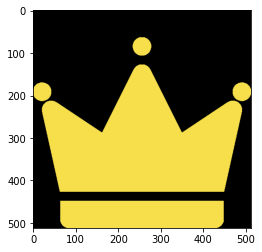

In [34]:
# 노드의 왕관 이미지 출력 
king_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/king.png'
king_bgr = cv2.imread(king_path)
king_rgb = cv2.cvtColor(king_bgr, cv2.COLOR_BGR2RGB)    
plt.imshow(king_rgb)
plt.show() 

lms에서 왕관 이미지를 열었을때는 배경이 흰색이었는데, 노드에서 열면 검정색이다.    
때문에 고양이 코 이미지와는 달리, np.where로 색이 검정색인 부분을 따도록 img_sticker==0으로 설정해줘야 했다. 

In [35]:
# sticker_area는 원본이미지에서 스티커를 적용할 위치를 crop한 이미지 입니다.
# 예제에서는 (344,0) 부터 (344+187, 0+89) 범위의 이미지를 의미합니다.
# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
# img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_show[0:0+89, 344:344+187]
# img_show[0:89, 344:531]
# 즉, x좌표는 344~531 / y좌표는 0~89가 됨
sticker_area = img_bgr[refined_y:refined_y+res.shape[0], refined_x:refined_x+res.shape[1]]
# 왕관 이미지에서 사용할 부분은 0이 아닌 색이 있는 부분을 사용합니다.
# 왕관 이미지에서 0이 나오는 부분은 흰색이라는 뜻, 즉 이미지가 없다는 소리임.
# 현재 왕관 이미지에서는 왕관과 받침대 밑의 ------ 부분이 됨
# 그렇기 때문에 0인 부분(이미지가 없는 부분)은 제외하고 적용
# sticker_area는 원본 이미지에서 스티커를 적용할 위치를 미리 잘라낸 이미지입니다.
# 즉, 왕관 이미지에서 왕관 이미지가 없는 부분(왕관과 받침대 밑의 ------ 부분)은 원본 이미지에서 미리 잘라놓은 sticker_area(스티커 적용할 부분 만큼 원본 이미지에서 자른 이미지)를 적용하고,
# 나머지 부분은 스티커로 채워주면 됨
# np.where는 조건에 해당하는 인덱스만 찾아서 값을 적용하는 방법이다.
# 아래 코드에서는 img_sticker가 0일 경우(왕관 이미지에서 왕관 부분 제외한 나머지 이미지)에는 sticker_area(원본 이미지에서 스티커를 적용할 위치를 미리 잘라낸 이미지)를 적용하고,
# 나머지 부분은 img_sticker(왕관 이미지)를 적용한다.
img_bgr[refined_y:refined_y+res.shape[0], refined_x:refined_x+res.shape[1]] = \
    np.where(res==255,sticker_area,res).astype(np.uint8)
print("슝~")

슝~


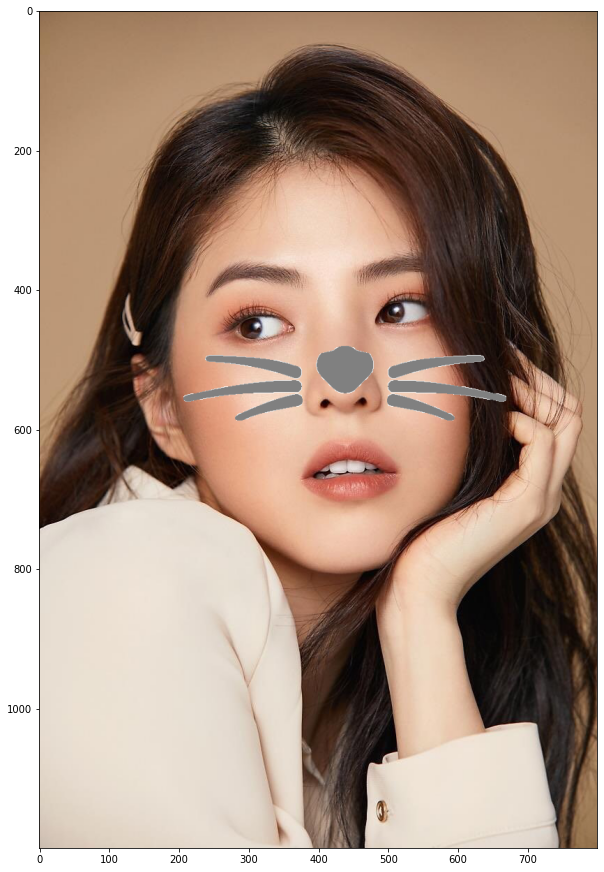

In [36]:
# 고양이 수염 적용한 이미지 출력 
plt.figure(figsize=(10,20))
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

원본 이미지에 alpha channel을 추가해 투명도를 조절한 스티커를 붙여보았는데, 뒤의 이미지를 투명하게 보여주지 못하고 검은색>회색으로 바뀌기만 했다.    
아래 링크에서처럼 addweight을 통해서 조절해주는게 나은 방법일 것 같다. 

Ref.   
https://velog.io/@choi_4843/OpenCV-%EC%B9%B4%EB%A9%94%EB%9D%BC-%EC%8A%A4%ED%8B%B0%EC%BB%A4-%EB%A7%8C%EB%93%A4%EA%B8%B0 

## Step 5. 문제점 찾아보기
### 누워있는 사진에 스티커 붙이기

In [37]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/pictures/한소희_옆.png'
img_bgr = cv2.imread(my_image_path, cv2.IMREAD_UNCHANGED)   

img_show = img_bgr.copy()     
plt.imshow(img_bgr)  

In [38]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)    
plt.imshow(img_rgb)
plt.show() 

In [39]:
img_bgr.shape

(812, 831, 4)

In [40]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환
print("\n   🌞   \n  \n  \n 🌵 🐪 🌴")


   🌞   
  
  
 🌵 🐪 🌴


In [41]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("\n   🌞   \n  \n  \n 🌵 🐪 🌴")


   🌞   
  
  
 🌵 🐪 🌴


In [42]:
print(dlib_rects)   

rectangles[]


90도 누워있는 이미지는 아예 detector가 얼굴로 인식하지 못한다.      

이미지를 코드로 회전시킨다. 

In [43]:
width, height = img_rgb.shape[:2] #(1080, 1080)
cp = (img_rgb.shape[1] / 2, img_rgb.shape[0] / 2) #회전 중심축 좌표 설정
print(cp)

img_rot = cv2.getRotationMatrix2D(cp, 90, 1) 
img_rot_dst = cv2.warpAffine(img_rgb,img_rot,(width,height))

(415.5, 406.0)


In [44]:
plt.imshow(img_rot_dst)
plt.show() 

이미지가 잘 세워졌다. 고개가 약간 기울어져있는데, bounding box를 확인해보자!

In [45]:
# bbox 확인
for dlib_rect in dlib_rects: 
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_rot_dst, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
    

print("<Face detection bounding box>")
plt.imshow(img_rot_dst)
plt.show()

<Face detection bounding box>


~~세워진 사진에서는 눕혀진 사진과 달리 얼굴로 인식하는 bounding box는 생겼지만, 위치가 잘못되었다.  
사진의 얼굴 부분보다 팔이 앞으로 나와서 얼굴의 일부를 가려서 그런건지..
처음 시도했던 사진보다 작아서 그런건지 모르겠다. ~~

처음 코드를 실행했을 때는 bounding box가 팔에 생겼는데, 다시 실행하는 과정에서 그 마저도 사라졌다.  

Ref.    
https://aminss.tistory.com/27
<br/>
<br/>
<br/>   

### 어두운 이미지에 스티커 붙이기 
이제 사진을 어둡게 했을 때 bounding box가 잘 생성되는지 살펴보자 

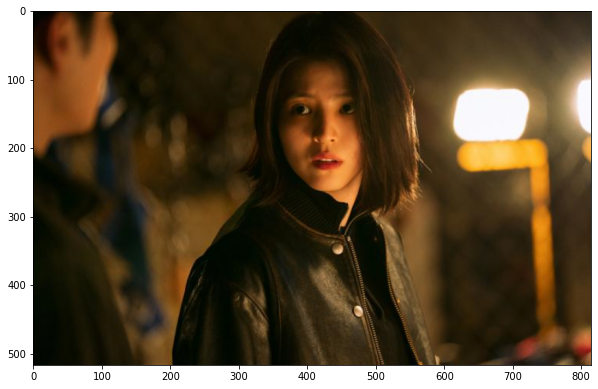

In [46]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/pictures/한소희_어둡.png'
img_bgr = cv2.imread(my_image_path, cv2.IMREAD_UNCHANGED)   
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)  
img_show = img_bgr.copy() 

plt.figure(figsize=(10,20))
plt.imshow(img_rgb)
plt.show() 

In [47]:
img_rgb.shape

(517, 815, 3)

In [48]:
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("\n   🌞   \n  \n  \n 🌵 🐪 🌴")


   🌞   
  
  
 🌵 🐪 🌴


rectangles[[(356, 116) (511, 270)]]


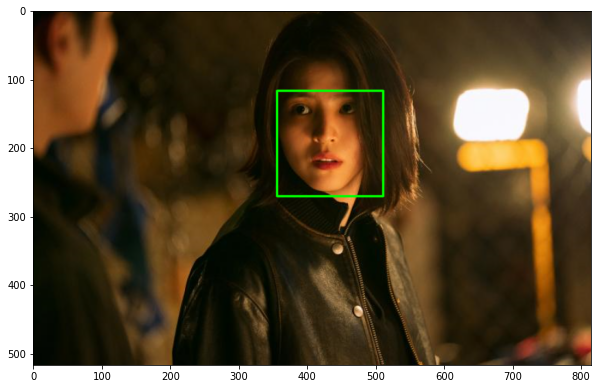

In [49]:
# bbox 확인
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽 x좌표
    t = dlib_rect.top() # 위쪽 y좌표
    r = dlib_rect.right() # 오른쪽 x좌표 
    b = dlib_rect.bottom() # 아래쪽 y좌표

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) 
    
img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,20))
plt.imshow(img_show_rgb)
plt.show()

원본 사진에서는 bounding box가 잘 생성되었다. 이제 사진을 어둡게 해보자. 

In [50]:
img_dark1 = cv2.subtract(img_rgb, 100)
img_dark2 = cv2.subtract(img_rgb, 1000)

plt.figure(figsize=(10,20))
plt.imshow(img_dark1)
plt.show() 

In [51]:
plt.figure(figsize=(10,20))
plt.imshow(img_dark2)
plt.show() 

100을 빼도 1000을 빼도 밝기가 크게 달라지지 않는다. brg 값에서 b만 변해서 그렇다고 한다.    
빼고자하는 값을 array로 만들어서 골고루 빼줘야 이미지가 어두워진다. 

Ref.    
https://jvvp.tistory.com/1030

In [52]:
val1 = 100
val2 = 200
array1 = np.full(img_rgb.shape, (val1, val1, val1), dtype=np.uint8)
array2 = np.full(img_rgb.shape, (val2, val2, val2), dtype=np.uint8)

dark1 = cv2.subtract(img_rgb, array1)
dark2 = cv2.subtract(img_rgb, array2)
dark1_show = dark1.copy()  
dark2_show = dark2.copy()  

plt.figure(figsize=(20,15))
plt.subplot(2, 1, 1) 
plt.imshow(dark1)
plt.title('-100')

plt.subplot(2, 1, 2) 
plt.imshow(dark2)
plt.title('-200')
plt.show() 

rgb 값에서 골고루 빼주었더니 확실히 어두워졌다. 

In [53]:
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽 x좌표
    t = dlib_rect.top() # 위쪽 y좌표
    r = dlib_rect.right() # 오른쪽 x좌표 
    b = dlib_rect.bottom() # 아래쪽 y좌표

    cv2.rectangle(dark1, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) 

plt.figure(figsize=(10,20))
plt.imshow(dark1)
plt.show()

rectangles[[(356, 116) (511, 270)]]


rectangles[[(356, 116) (511, 270)]]


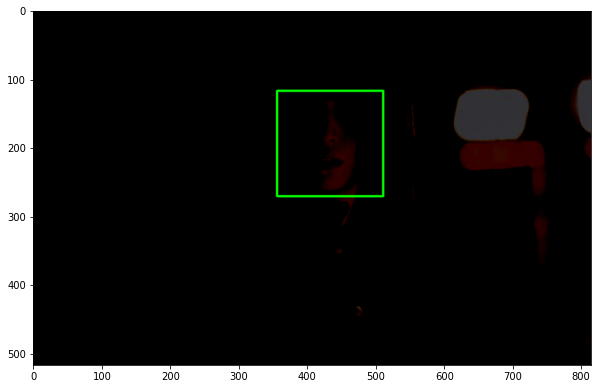

In [54]:
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽 x좌표
    t = dlib_rect.top() # 위쪽 y좌표
    r = dlib_rect.right() # 오른쪽 x좌표 
    b = dlib_rect.bottom() # 아래쪽 y좌표

    cv2.rectangle(dark2, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) 

plt.figure(figsize=(10,20))
plt.imshow(dark2)
plt.show()

100, 200을 뺀 이미지 모두 bounding box가 잘 생성되었다.   
배경을 포함한 모든 값에서 100, 200씩 뺐기 때문에, 얼굴을 인식하는 데에는 무리가 없는 것 같다. 
<br/>
<br/>
### 첫 번째 이미지 스티커 붙이기 

In [55]:
list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(dark1, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


In [56]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(dark1, point, 2, (0, 255, 255), -1)

plt.figure(figsize=(10,20))
plt.imshow(dark1)
plt.show()

In [57]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): 
    print (landmark[30])
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height()//2
    w = h = dlib_rect.width() 
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(428, 190)
(x,y) : (428,113)
(w,h) : (156,156)


In [58]:
rabbit_path = os.getenv('HOME')+'/aiffel/camera_sticker/pictures/rabbit.png' 
rabbit_sticker = cv2.imread(rabbit_path) 
rabbit_sticker = cv2.resize(rabbit_sticker, (w,h)) 
print (rabbit_sticker.shape) 

(156, 156, 3)


In [59]:
plt.imshow(rabbit_sticker)
plt.show() 

In [60]:
refined_x = x - w // 2 
refined_y = y - h 

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (350,-43)


In [61]:
if refined_x < 0: 
    rabbit_sticker = rabbit_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    rabbit_sticker = rabbit_sticker[-refined_y:, :] 
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (350,0)


In [62]:
sticker_area = dark1_show[refined_y:refined_y+rabbit_sticker.shape[0], refined_x:refined_x+rabbit_sticker.shape[1]]

dark1_show[refined_y:refined_y+rabbit_sticker.shape[0], refined_x:refined_x+rabbit_sticker.shape[1]] = \
    np.where(rabbit_sticker==255,sticker_area,rabbit_sticker).astype(np.uint8)
print("슝~")

슝~


In [63]:
plt.figure(figsize=(10,20))
plt.imshow(dark1_show)
plt.show()

### 두 번째 이미지 스티커 붙이기 

In [64]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(dark2, point, 2, (0, 255, 255), -1)

plt.figure(figsize=(10,20))
plt.imshow(dark2)
plt.show()

In [65]:
sticker_area = dark2_show[refined_y:refined_y+rabbit_sticker.shape[0], refined_x:refined_x+rabbit_sticker.shape[1]]

dark2_show[refined_y:refined_y+rabbit_sticker.shape[0], refined_x:refined_x+rabbit_sticker.shape[1]] = \
    np.where(rabbit_sticker==255,sticker_area,rabbit_sticker).astype(np.uint8)
print("슝~")

슝~


In [66]:
plt.figure(figsize=(10,20))
plt.imshow(dark2_show)
plt.show()

100, 200을 뺀 이미지 모두 얼굴 인식이 잘되어서 스티커가 잘 붙었다.  
그러나 임의로 어둡게 조정한 이미지가 아닌, 원래 어두운 이미지는 과연 얼굴 인식이 잘 될지 궁금하다. 
<br/>
<br/>
### 촬영거리가 먼 이미지에 스티커 붙이기 

In [116]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/pictures/한소희_먼.png'
img_bgr = cv2.imread(my_image_path, cv2.IMREAD_UNCHANGED)   
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)  
img_show = img_rgb.copy() 

print(img_rgb.shape)

plt.figure(figsize=(10,20))
plt.imshow(img_rgb)
plt.show() 

(584, 449, 3)


In [117]:
dlib_rects = detector_hog(img_rgb, 4)   # (image, num of image pyramid)

# bbox 확인
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽 x좌표
    t = dlib_rect.top() # 위쪽 y좌표
    r = dlib_rect.right() # 오른쪽 x좌표 
    b = dlib_rect.bottom() # 아래쪽 y좌표

    cv2.rectangle(img_bgr, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) 
    
img_show_rgb =  cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,20))
plt.imshow(img_show_rgb)
plt.show()

rectangles[[(212, 98) (246, 132)]]


detector_hog(img_rgb, 4)에서 1-3까지는 얼굴 인식을 못하다가 4로 설정하니까 얼굴을 인식했다.     
이미지 거리가 멀어서, 이미지 사이즈가 충분히 크지않아서, 혹은 눈썹이 없어서..등의 이유로 추측해보았다. 

In [118]:
list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_show_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


In [119]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show_rgb, point, 2, (0, 255, 255), -1)

plt.figure(figsize=(10,20))
plt.imshow(img_show_rgb)
plt.show()

In [120]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): 
    print (landmark[30])
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height()//2
    w = h = dlib_rect.width() 
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(233, 115)
(x,y) : (233,98)
(w,h) : (35,35)


(512, 512, 3)


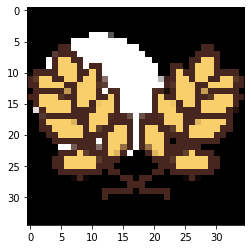

In [138]:
hero_path = os.getenv('HOME')+'/aiffel/camera_sticker/pictures/hero.png' 
hero_sticker = cv2.imread(hero_path) 
print (hero_sticker.shape)

hero_sticker = cv2.cvtColor(hero_sticker, cv2.COLOR_BGR2RGB)    
hero_sticker = cv2.resize(hero_sticker, (w,h)) 

plt.imshow(hero_sticker)
plt.show() 

hero 스티커를 불러왔더니, 배경이 조금 이상하다.    
이미지 사이즈에 맞춰서 스티커 사이즈를 조정해주었더니, 화질이 안좋다. 

In [122]:
refined_x = x - w // 2 
refined_y = y - h 

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (216,63)


In [123]:
if refined_x < 0: 
    hero_sticker = hero_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    hero_sticker = hero_sticker[-refined_y:, :] 
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (216,63)


In [113]:
sticker_area = img_show[refined_y:refined_y+hero_sticker.shape[0], refined_x:refined_x+hero_sticker.shape[1]]

img_show[refined_y:refined_y+hero_sticker.shape[0], refined_x:refined_x+hero_sticker.shape[1]] = \
    np.where(hero_sticker==0,sticker_area,hero_sticker).astype(np.uint8)

print("슝~")

슝~


np.where를 0만 했더니 hero 스티커 뒤의 흰 동그라미가 남았다.    
그래서 255를 한번 더 넣어주었더니 오히려 흰색과 검정색 모두 남았다. 

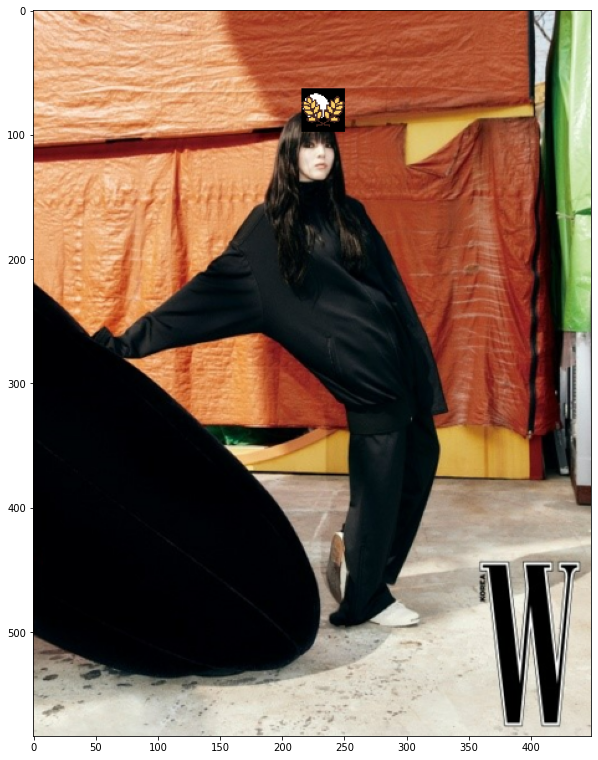

In [114]:
plt.figure(figsize=(10,20))
plt.imshow(img_show)
plt.show()

In [158]:
# 스티커 배경의 흰색을 검은색으로 바꾸기 
hero_sticker2 = np.where(hero_sticker == 255, 0, hero_sticker).astype(np.uint8)

plt.imshow(hero_sticker2)
plt.show()

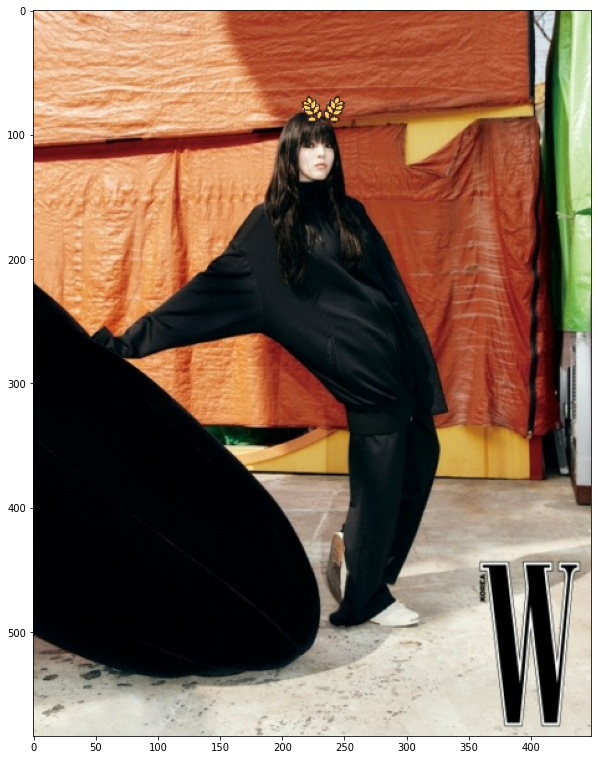

In [159]:
sticker_area = test1[refined_y:refined_y+hero_sticker.shape[0], refined_x:refined_x+hero_sticker.shape[1]]

test5[refined_y:refined_y+hero_sticker.shape[0], refined_x:refined_x+hero_sticker.shape[1]] = \
    np.where((hero_sticker2 == 0), sticker_area, hero_sticker2).astype(np.uint8)

plt.figure(figsize=(10,20))
plt.imshow(test5)
plt.show()

정상적으로 출력되었다! 이마로 위치를 옮겨서 하면 좋을 것 같지만, 시간이 부족해서 여기서 마무리해야겠다.     
<br/>
<br/>
대체로 어두운 이미지, 촬영 거리가 먼 이미지는 얼굴 인식을 할 수 있다. 
그러나 팔과 같이 얼굴과 비슷한 색이 혼란을 일으키거나 얼굴의 일부를 가릴때, 얼굴이 일정 정도 이상 회전해있을때는 잘 인식되지 않았다.   
얼굴의 기울기에 따라 스티커 이미지를 기울여서 적용하는 것과 스티커의 투명도를 조절하는 부분을 완수하지 못해서 아쉽다. 

## 회고

**헤맨 부분** 
- error: OpenCV(4.5.3) /tmp/pip-req-build-agffqapq/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor' 에러가 나왔다. 그 전에 copy()로 인한 에러도 나왔는데, 절대경로로 설정하니 해결되었다.  
- model_path에서 RuntimeError가 나왔다. 절대경로로 바꿔주고 앞에 /를 넣어 해결되었다. 현재 ipynb 파일과 경로의 다른 부분부터 상대경로 설정을 잘 하면 에러 없이 된다고 한다. 
- 노드의 코드를 따왔더니 머리에 붙은 고양이코 스티커를 코 위치로 바꿔주는데 많이 헤맸다. 
- 스티커 이미지를 더 투명하기 바꾸기 위해 스티커 이미지 자체의 투명도를 변경한 후 합치려 했는데. 틀린 방법이었다. 
- hero 스티커의 배경이 그냥 뷰어로 봤을때는 흰색이었는데, 막상 코드로 불러오면 흰색+검정색이 합쳐져 코드로 제거하기 어려웠다. np.where에서 0, 255로 각각 한번씩 해보기도하고, &, |로 조건문을 넣기도 했는데 다 실패했다. 진표 퍼실님의 도움으로 스티커 이미지 배경 자체를 수정해 해결했다. 


**문제를 해결하기 위한 시도와 원인 추론**
- 고양이 수염 이미지를 넣으니 수염 부분이 비고 배경이 흰색인 스티커가 나왔다. img_sticker==0을 255로 바꾸니 해결되었다. 
- 고양이 코가 머리에 붙은 채 출력되었다. 랜드마크 숫자가 노드의 왕관에 맞춰져있어서 코의 위치로 바꿔주었다. 
- img_show에 스티커를 적용했더니 랜드마크, 비박스가 있는 상태에서 스티커가 붙었다. 마지막 스티커 붙이는 전 셀부터 원본 이미지인 img_bgr로 바꿔주었더니 해결되었다. 
- 고양이 코 이미지의 투명도를 바꾸고 싶어서 alpha channel을 추가해 조절하려니 에러가 났다. 원본 이미지에도 cv2.IMREAD_UNCHANGED를 추가했는데도 channel이 3개에서 4개로 변하지 않았다. 없는 알파채널을 새로 생성해 merge로 이용해 합쳐주었다. 원래 알파채널이 없는 이미지는 UNCHANGED로 설정해주어도 4개로 변하지 않는 것 같다. 
- 촬영거리가 먼 이미지는 처음에 bounding box가 생성되지 않았다. 그 원인으로는 촬영거리가 멀어서, 눈썹이 안보여서, 이미지 사이즈가 충분히 크기 않아서..중의 하나일 것으로 추측했다. 

**새롭게 알게된 부분**
- png는 알파채널이 반영된 이미지를 보여주기 때문에, 이미지를 열어서 보는 것 보다 코드로 불러와서 보는게 정확한 색상을 파악할 수 있다.  
- 스티커의 투명도를 조절하기 위해서는 스티커 이미지 자체의 투명도를 조절한 후 합치기 보다, 합치면서 addweight로 조절하는게 낫다.
- 다음에 png 이미지를 다룰때는 무조건 원본이 png인 이미지 중에 적당히 큰 이미지를 찾아야겠다. 원본이 png가 아니라면 png로 변형해도 채널이 3개라 추가 작업을 해줘야한다. 또한 이미지가 작으면 모델이 제대로 인식하지 못하는 것 같다. 
- boung box가 생성되지 않을때는 detector_hog의 숫자를 키워주면 인식이 잘 될 수도 있다.   
- 스티커를 붙일 원본 이미지의 확장자, 화질도 중요하지만, 스티커 역시 중요하다. 붙이기 전에 먼저 불러와서 배경 등을 확인하고 코드를 진행하는게 좋을 것 같다. 


**아직도 모르는 부분**
- 노드에서 추천하는 고양이 코 스티커는 img_sticker==255로 바꿨더니 괜찮은데, 같은 사이트에서 받은 다른 png 이미지들은 적용했을 때 흰색 배경이 흐릿하게 같이 보인다. 어떻게 해결해야할지 모르겠다. 
- 아직도 스티커 위치를 좌표로 조절하는 부분의 코드가 이해가 안된다. 
- 나는 아래 코드 써도 스티커의 투명도 조절해서 합쳐지지 않는다. 왜 나는 안되고, 이 코드를 따온 곳에서는 되는지 모르겠다. 
```python
sticker_area = img_bgr[y:y +img_sticker.shape[0], x:x+img_sticker.shape[1]]
add = cv2.addWeighted(sticker_area, 0.5, img_sticker, 0.3, 0)
img_bgr[y:y +cat_sticker.shape[0], x:x+cat_sticker.shape[1]] = \
    np.where(cat_sticker==0,add,sticker_area).astype(np.uint8)
```
- 모델이 다른 부분을 얼굴로 인식해 bounding box를 생성했을 때, 코드를 어떻게 바꾸면 얼굴을 제대로 인식할 수 있을까? 아마 hog 수치를 늘리면 가능할 것 같다. 
- 상대경로도 설정만 잘해주면 에러가 나지 않던데, 아직 잘 안된다. 
- 소명님이 스티커 회전해서 붙이는 방법을 알려줬는데, 시간이 부족해서 미처 시도하지 못했다. 
